# Play with OpenAI-gym and python


Now that we described the environment, it is time to play with it with python. OpenAI provides us with a gym environment already fully coded so the task is quite easy.



## Introduction 
I have chosen to follow the tutorial when proceeding to reinforcement learning problems for the reason that it is still a bit confusing for myself. Concepts such as Markov Decision Process, Reward Functions, Bellman Equation seems to be in a different universe. Going through this learning process myself, I found that going through an example and practical implementation of reinforcement learning model has helped a lot in clearing up the concepts.

# Reinforcement Learning and Q learning —An example of the ‘taxi problem’ in Python
I have used this Tutorial for my exercise to go deeper into understanding the Q Learning : https://towardsdatascience.com/reinforcement-learning-and-q-learning-an-example-of-the-taxi-problem-in-python-d8fd258d6d45

In this post, she discusses reinforcement learning and Q-learning, and also shares an example of using the technique of Q-learning to solve an reinforcement learning problem — “the taxi problem ” in python. 

## The taxi Problem
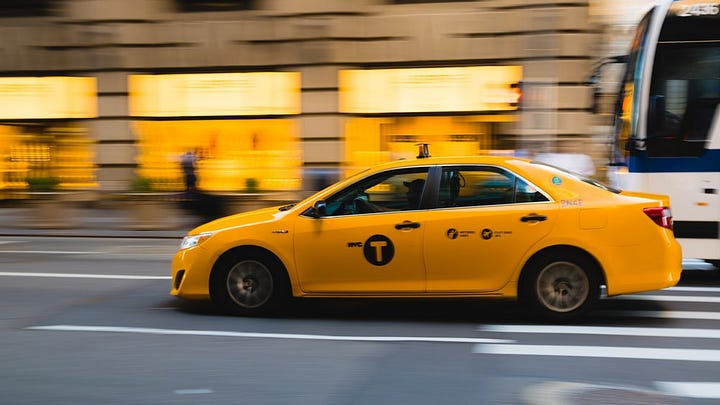

### Problem:
- Starting at a random state, the job is to get the taxi to the passenger’s location, pick up the passenger and drive to the destination, drop the customer, and then the episode ends.
- There are 4 designated locations in the grid indicated by <b>Red — 0 , Green — 1, Yellow — 2, and Blue — 3, </b>the blue letter correspond to pick up location and purple letter indicate the drop off location. The solid lines indicate walls that the taxi cannot pass, whereas the filled rectangle is the taxi, when it is yellow it is empty and when it is green it is carrying a passenger.

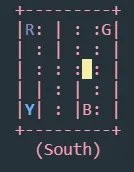

- Each state is defined by a 4 entries tuple: （taxi_row, taxi_col, passenger_location, destination). For example, the image shows state (2,3,2,0), which means we are at position row index 2 (note that python index start at 0 so this means row 3), and column index 3, the passenger is at Yellow, encoded by 2 and our destination is red, encoded by 0.
- State Space: The state soace indicates all possible states which are consist of 500 possible states, with 25 possible taxi positions, 5 possible locations of the passenger (including the case when the passenger is in the taxi), and 4 destination locations
- Action space: There are 6 discrete deterministic actions: 0 — move south, 1 — move north, 2 — move east, 3 — move west, 4 — pickup passenger , 5 — drop off passenger
- Rewards: Except for delivering the passenger with gets a reward of +20, each extra step has a penalty of R=-1, executing “pickup” and “drop-off” actions illegally results in R=-10



## Installing Libraries

In [3]:
import gym
import random
import numpy as np
from IPython.display import clear_output
from time import sleep

## Setting / Rendering State
Here we render the state to be able to visualize the taxi enviorment.

In [4]:
random.seed(1234)

streets = gym.make("Taxi-v2").env 
streets.render() # ouputs visual of taxi environment

[2023-04-12 11:04:21,830] Making new env: Taxi-v2


+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



c:\users\victo\appdata\local\programs\python\python38\lib\site-packages\gym\envs\registration.py:17: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


I will set initial state for the problem where the agent start at row index 2 and column index 3 for consistency.
The customer will need to be picked up from <b>Y</b> spot and drop him off at <b>R</b>. 

In [5]:
initial_state = streets.encode(2, 3, 2, 0)

streets.s = initial_state

streets.render()

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



### Setting / Creating the Q-Table
A <b>Q-table</b> is a table that maps each state-action pair to a corresponding value, which represents the expected future reward that the agent will receive by taking that action in that state, and is used to implement Reinforcement Learning in a tabular form.
The Q-Table will be initialized in a 2D Numpy Array that represents every possible state and action combination.
Here the main function is to observe the reward and update the value function for the particular state and action pair using a formula to update the Q-table.

In [6]:
q_table = np.zeros([streets.observation_space.n, streets.action_space.n])

#### Setting Parameters
- Learning rate: is a hyperparameter that determines the step size at which a machine learning model adjusts its parameters during training.
- Discount factor: is a hyperparameter that determines the importance of future rewards compared to immediate rewards.
- Exploration: is the process by which a Reinforcement Learning agent chooses actions that are not based solely on its current knowledge, in order to gather more information about the environment and potentially improve its performance.
- Epochs: the amount of times the taxi will expore for.

In [7]:
learning_rate = 0.1
discount_factor = 0.6
exploration = 0.1
epochs = 10000

In [8]:
for taxi_run in range(epochs):
    state = streets.reset()
    done = False
    
    while not done:
        random_value = random.uniform(0, 1) # episilon greedy strategy. 
        if (random_value < exploration):
            action = streets.action_space.sample() # Explore a random action
        else:
            action = np.argmax(q_table[state]) # Use the action with the highest q-value
            
        next_state, reward, done, info = streets.step(action)
        
        prev_q = q_table[state, action]
        next_max_q = np.max(q_table[next_state])
        new_q = (1 - learning_rate) * prev_q + learning_rate * (reward + discount_factor * next_max_q)
        q_table[state, action] = new_q
        
        state = next_state
        
        

### Evaluating the QTable
We will be looking at which direction the Qtable chooses to go for the first step to see manually if that step makes sense. Initially looking at the start of where the taxi is located would the best option be to move to the left which we will find out.

In [9]:
q_table[initial_state]  

array([-2.34429059, -2.34127478, -2.34763716, -2.18255258, -8.03193692,
       -8.34993056])

Looking at the initial state of the Q-Table, you can see that the highest values is <b>-2.18255258</b>.
If we can recall, the actions that are possible are:

0. move south, 
1. move north, 
2. move east, 
3. move west, 
4. pickup passenger , 
5. drop off passenger

Therefore, the higehst value indicates moving west (left). If we look back at the original visualization, we see that the taxi needs to move to the left to be able to pick up the passenger from position <b>Y</b>.


### Trying out another state 
I will be trying another state to test the Qtable.

In [10]:
initial_state = streets.encode(2, 3, 2, 0)

streets.s = initial_state

streets.render()

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)


Instead of using the above state we will be using the following state

In [11]:
initial_state = streets.encode(3, 3, 2, 0)

streets.s = initial_state

streets.render()

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)


The best option would be for the taxi to move upwards which can be found out with the following cell if the model is covers correctly.

In [12]:
q_table[initial_state]  

array([-2.3724225 , -2.30953295, -2.38421287, -2.36673175, -6.8407679 ,
       -6.26940021])

Above we see that the lowest score is <b>-2.30953192</b> which also means going north which is upwards based on the location of the value in the array given.

# Using the Q-table to instruct the Taxi driver
The Q-table that has been generated will be used to instruct the taxi driver for different start states to perform its task. 
The maximum number of steps the taxi driver can take to perform the tast is 25 which we allow them to perform 10 times. 

In [16]:
lengths=[]
for tripnum in range(1, 11):
    state = streets.reset()
   
    done = False
    trip_length = 0
    
    while not done and trip_length < 25:
        action = np.argmax(q_table[state])
        next_state, reward, done, info = streets.step(action)
        clear_output(wait=True)
        print("Trip number " + str(tripnum) + " Step " + str(trip_length))
        print(streets.render(mode='ansi'))
        sleep(.2)
        state = next_state
        trip_length += 1
    lengths.append(trip_length)
    
    sleep(.2)
avg_len=sum(lengths)/10
print(avg_len)


Trip number 10 Step 9
14.7


From using the Qtable to instruct the taxi driver is can be seen that the average number of steps for the taxi driver to complete the tast is <b>14.7 steps</b> where the max was 25.

## Hypertuning the Hyperparameters
Here I will be trying to improve the existing model by tuning its hyperparameters:
- Learning Rate
- Discount Factor
- Exploration

The chosen values that have been used to test different possibilities for each hyperparameter are chosen from other who have also worked on such a project.
To not reinvent the wheel I have chosen to use the same values.

### Functions
Below are two function defined which are use to hypertune these parameters with different values.
One is for the QLearning and the other is for calculating the average trip length.

In [17]:
def q_learning(learning_rate,discount_factor,exploration,epochs):
    q_table = np.zeros([streets.observation_space.n, streets.action_space.n])
# a 2D array that represent every possible state and action in the virtual space and initialize all of them to 0
    for taxi_run in range(epochs):
        state = streets.reset()
        done = False
            
        while not done:
            random_value = random.uniform(0, 1)
            if (random_value < exploration):
                action = streets.action_space.sample() # Explore a random action
            else:
                action = np.argmax(q_table[state]) # Use the action with the highest q-value
                    
            next_state, reward, done, info = streets.step(action)
                
            prev_q = q_table[state, action]
            next_max_q = np.max(q_table[next_state])
            new_q = (1 - learning_rate) * prev_q + learning_rate * (reward + discount_factor * next_max_q)
            q_table[state, action] = new_q
                
            state = next_state

In [18]:
def average_trip_length():
    lengths=[]
    for tripnum in range(1, 11):
        state = streets.reset()
        done = False
        trip_length = 0
        
        while not done and trip_length < 25:
            action = np.argmax(q_table[state])
            next_state, reward, done, info = streets.step(action)
            clear_output(wait=True)
            state = next_state
            trip_length += 1
        lengths.append(trip_length)
    avg_len=sum(lengths)/10
    return avg_len

### Discount  Factor
I will first be trying out different ranges for the dicount factor to see the best value to use

In [25]:
learning_rate = 0.1
discount_factor = [0.5,0.6,0.7,0.8,0.9]
exploration = 0.1
epochs = 1000
difdis=[0,0,0,0,0]
for j in range(1,10):
    for i in range(len(discount_factor)):
        q_learning(learning_rate,discount_factor[i],exploration,epochs)
        difdis[i]+=average_trip_length()

print(np.array(difdis)/10)

[12.72 11.65 11.45 12.24 11.61]


As we can see from the above cell, using a <b>discount factor of 0.7</b> gave the best results with a average step of <b>11.45</b>.

### Learning Rate
I will first be trying out different ranges for the learning rates to see the best value to use.

In [27]:
learning_rate = [0.1,0.2,0.3,0.4,0.5]
discount_factor = 0.7
exploration = 0.1
epochs = 1000
difdis=[0,0,0,0,0]
for j in range(1,10):
    for i in range(len(learning_rate)):
        q_learning(learning_rate[i],discount_factor,exploration,epochs)
        difdis[i]+=average_trip_length()

print(np.array(difdis)/10)

[11.84 11.58 11.86 11.57 11.53]


As we can see from the above cell, using a <b>learning rate of 0.5</b> gave the best results with a average step of <b>11.53</b>.

### Exploration
I will first be trying out different ranges for the explorations to see the best value to use.

In [28]:
learning_rate = 0.5
discount_factor = 0.7
exploration = [0.1,0.2,0.3,0.4]
epochs = 1000
difdis=[0,0,0,0]
for j in range(1,10):
    for i in range(len(exploration)):
        q_learning(learning_rate,discount_factor,exploration[i],epochs)
        difdis[i]+=average_trip_length()

print(np.array(difdis)/10)

[11.61 12.32 11.48 11.72]


As we can see from the above cell, using a <b>exploration of 0.3</b> gave the best results with a average step of <b>11.48</b>.

### Optimize Hyperparamters

In [30]:
learning_rate = 0.5
discount_factor = 0.7
exploration = 0.4
epochs = 1000
difdis=[]
for j in range(1,10):
        q_learning(learning_rate,discount_factor,exploration,epochs)
        difdis.append(average_trip_length())

print(sum(difdis)/10)

11.889999999999997


Finally, combining the optimal outcomes for each parameter, I’ve achieved a much better result, the average number of steps reduced from <b> 14.7 to 11.89!</b>

# Conclusion
To conclude from doing this exercise/ tutorial that i have found, i have learned a lot about reinforcement leanring and the steps to training a agent,